In [12]:
import pandas as pd
import numpy as np
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
import os
os.listdir()
os.getcwd()

'/voc/work'

In [14]:
import pandas as pd, numpy as np

def extractTitle(name):
    if "." in name:
        return(name.split(".")[0].split(",")[1].strip())
    else:
        return("No title")

def cleanShipData(data):
    df=data.copy()
    df['Title'] = df['Name'].apply(extractTitle)

    # fill the missing age value
    df["Age"] = df.groupby('Title')['Age'].transform(lambda x:x.fillna(x.median()))

    # dropping Cabin as it has too many missing values
    df.drop(columns='Cabin',inplace=True)

    # deleting rows where embarked is missing
    df.dropna(subset=['Embarked'],inplace=True)

    # create TravelAlone
    df['Travelalone'] =  np.where((df['SibSp'] + df['Parch']) > 0, 0 , 1).astype('uint8')

    # dropping features which are not relevant
    df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Title'],inplace=True)

    df_dummy = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True,dtype = int)
    return(df_dummy)

In [15]:

#from ship_helper import *

df_clean=cleanShipData(df)

In [16]:
df_clean

,Survived,Pclass,Age,Fare,Travelalone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,1
1,1,1,38.0,71.2833,0,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,0,0,0,1
4,0,3,35.0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,1,0,1
887,1,1,19.0,30.0000,1,0,0,1
888,0,3,21.0,23.4500,0,0,0,1
889,1,1,26.0,30.0000,1,1,0,0


In [17]:
# Separate feature and outcome
X=df_clean.drop(columns="Survived")
y=df_clean[['Survived']]

# split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [22]:
# Build the model
# Decision tree model


from sklearn.tree import DecisionTreeClassifier
dtModel = DecisionTreeClassifier()
dtModel.fit(X_train,y_train)

print("Train Score : ",dtModel.score(X_train,y_train))
print("Test Score : ",dtModel.score(X_test,y_test))

y_train_pred = dtModel.predict(X_train)
y_test_pred = dtModel.predict(X_test)

#from sklearn.metrics import classifier_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("--------------------- Train Report -------------------------------")
print(classification_report(y_train, y_train_pred))
print("--------------------- Train Report -------------------------------")
print(classification_report(y_test, y_test_pred))

Train Score :  0.9834834834834835
Test Score :  0.7399103139013453
--------------------- Train Report -------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       417
           1       1.00      0.96      0.98       249

    accuracy                           0.98       666
   macro avg       0.99      0.98      0.98       666
weighted avg       0.98      0.98      0.98       666

--------------------- Train Report -------------------------------
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       132
           1       0.68      0.68      0.68        91

    accuracy                           0.74       223
   macro avg       0.73      0.73      0.73       223
weighted avg       0.74      0.74      0.74       223



ValueError: Data must be 1-dimensional

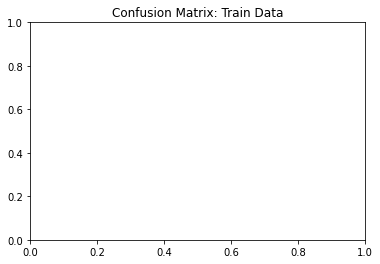

In [26]:
# import seaborn as sns
# from matplotlib import pyplot as plt
# plt.title("Confusion Matrix:  Train Data")
# sns.heatmap(pd.crosstab(y_train,y_train_pred),annot=True,cmap='viridis')
# plt.show()


# plt.title("Confusion Matrix:  Test Data")
# sns.heatmap(pd.crosstab(y_test,y_test_pred),annot=True,cmap='viridis')
# plt.show()

import seaborn as sns
from matplotlib import pyplot as plt
plt.title("Confusion Matrix: Train Data")
sns.heatmap(pd.crosstab(y_train,y_train_pred),annot=True,cmap='viridis')
plt.show()

plt.title("Confusion Matrix: Test Data")
sns.heatmap(pd.crosstab(y_test,y_test_pred),annot=True,cmap='viridis')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:

Model = RandomForestClassifier(n_estimators=1000,min_samples_split=10,min_samples_leaf=10,n_jobs=-1,verbose=True)
Model.fit(X_train,y_train)
print("Train Score: ",Model.score(X_train,y_train))
print("Test Score: ",Model.score(X_test,y_test))
y_train_pred = Model.predict(X_train)
y_test_pred = Model.predict(X_test)
from sklearn.metrics import classification_report
print("__________________ Train Report _____________________")
print(classification_report(y_train,y_train_pred))
print("__________________ Test Report _____________________")
print(classification_report(y_test,y_test_pred))

/usr/local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel

Train Score:  0.8558558558558559
Test Score:  0.7668161434977578


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s


__________________ Train Report _____________________
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       417
           1       0.89      0.70      0.78       249

    accuracy                           0.86       666
   macro avg       0.87      0.82      0.84       666
weighted avg       0.86      0.86      0.85       666

__________________ Test Report _____________________
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       132
           1       0.78      0.59      0.68        91

    accuracy                           0.77       223
   macro avg       0.77      0.74      0.75       223
weighted avg       0.77      0.77      0.76       223



[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [37]:

from sklearn import metrics

y_pred_train = classifier.predict(X_train)
print('Train Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
print('Train Precision:', metrics.precision_score(y_train, y_pred_train))
print('Train Recall:', metrics.recall_score(y_train, y_pred_train))

y_pred = classifier.predict(X_test)
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Test Precision:', metrics.precision_score(y_test, y_pred))
print('Test Recall:', metrics.recall_score(y_test, y_pred))

Train Accuracy: 0.9069069069069069
Train Precision: 0.9269406392694064
Train Recall: 0.8152610441767069
Test Accuracy: 0.7892376681614349
Test Precision: 0.7894736842105263
Test Recall: 0.6593406593406593


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Assuming y_test contains the true labels and y_predict contains the predicted labels
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("################ Confusion Matrix for train data ##################")
print(confusion_matrix(y_train,y_pred_train))
print("################ Confusion Matrix for test data ##################")
print(confusion_matrix(y_test,y_pred))
report_train = classification_report(y_train, y_pred_train, zero_division=1)
report_test = classification_report(y_test, y_pred, zero_division=1)
print("################ Classification Report: Train #######################")
print(report_train)
print("############## Classification Report: Test ######################")
print(report_test)


Train Accuracy: 0.9069069069069069
Test Accuracy: 0.7892376681614349
################ Confusion Matrix for train data ##################
[[401  16]
 [ 46 203]]
################ Confusion Matrix for test data ##################
[[116  16]
 [ 31  60]]
################ Classification Report: Train #######################
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       417
           1       0.93      0.82      0.87       249

    accuracy                           0.91       666
   macro avg       0.91      0.89      0.90       666
weighted avg       0.91      0.91      0.91       666

############## Classification Report: Test ######################
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       132
           1       0.79      0.66      0.72        91

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg   

In [ ]:
pd.DataFrame({'Feature Name':X_train.dataset[:,:-1],'Importance Score':classifier.feature_importances_})

In [33]:
from sklearn.model_selection import GridSearchCV # alpha = [0,1,10,20,100] compare model with all these alpha value for Lasso/Regres
#CV is the cross validation


In [34]:
#HyperParameter Tuning
iris_parameters = {'max_depth':[6,8,10],'min_samples_split':[4,6,7,9],'min_samples_leaf':[6,7,9]}
from sklearn.model_selection import GridSearchCV
gridModel = GridSearchCV(DecisionTreeClassifier(),param_grid=iris_parameters,cv=2)
gridModel.fit(X_train,y_train)
gridModel.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, min_samples_split=4)

In [40]:
#Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
data_cleaner = FunctionTransformer(cleanShipData,validate=False)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [47]:
#pipeline_ship = Pipeline([('pf',PolynomialFeatures(degree=2)),('std', StandardScaler()),('shipmodel',RandomForestClassifier())])

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
pipeline_ship = Pipeline([('Pf',PolynomialFeatures(degree=2)),
('std',StandardScaler()),
('shipmodel',LogisticRegression(C=300,max_iter=20))])
X_train.head()
pipeline_ship.fit(X_train,y_train)
pipeline_ship.score(X_train,y_train)
pipeline_ship.score(X_test,y_test)
import joblib
joblib.dump(pipeline_ship,"shipModel.h5")

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['shipModel.h5']

In [43]:
pipeline_ship.fit(X_train,y_train)

/usr/local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('std', StandardScaler()),
                ('shipmodel', RandomForestClassifier())])